In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import optuna
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [329]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [360]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [361]:
df.shape

(7043, 21)

In [362]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [363]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [365]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [366]:
df = df.iloc[:,1:]

In [367]:
df.replace({'No phone service':'No','No internet service':'No'},inplace = True)

In [368]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [369]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [370]:
for i in df.columns:
  if df[i].dtypes == 'object':
    df[i] = df[i].str.strip()
df.replace({'':np.nan}).isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [371]:
df = df.dropna()

In [372]:
X = df.drop('Churn',axis = 1)
y = df['Churn'].replace({'Yes':1,'No':0})

/tmp/ipython-input-3103292381.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Churn'].replace({'Yes':1,'No':0})


In [373]:
y.value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


In [374]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [384]:
def encoder(f):
  enc = OHE(sparse_output = False)
  for i in f.columns:
    if f[i].dtypes == 'object':
      encoded = enc.fit_transform(f[[i]])
      cols = enc.get_feature_names_out()
      f2 = pd.DataFrame(encoded,columns = cols,index = f.index)
      f = f.drop(i,axis = 1)
      f = pd.concat([f,f2],axis = 1)
  return f

In [376]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3946,Female,0,No,No,9,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,58.50,539.85
3394,Male,0,No,No,26,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Electronic check,61.55,1581.95
1635,Female,0,No,No,3,Yes,No,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,69.95,220.45
4088,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,73.60,520.00
1886,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),60.40,3953.70


In [386]:
X_train = encoder(X_train)

In [387]:
X_test = encoder(X_test)

<Axes: >

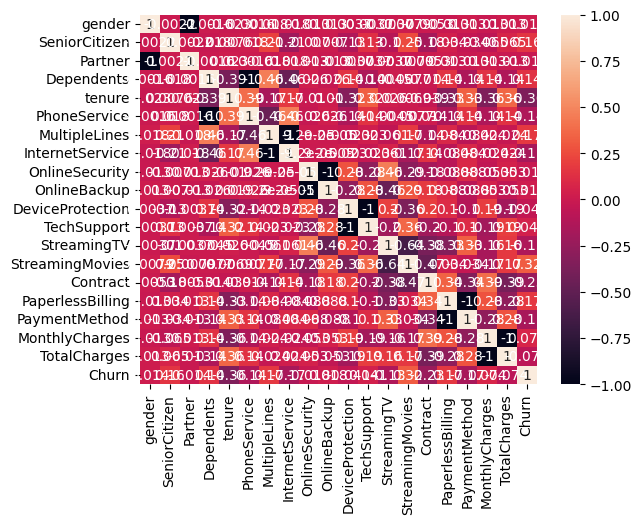

In [257]:
#همبستگی ستون ها ضعیفه به احتمال زیاد نمره پایینی خواهیم گرفت
sns.heatmap(pd.concat([X_train,y_train],axis = 1).corr(),annot = True)

<Axes: >

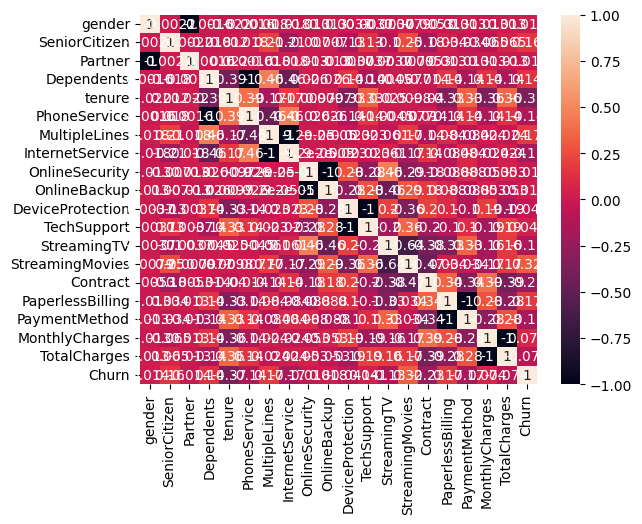

In [258]:
sns.heatmap(pd.concat([X_train,y_train],axis = 1).corr(method = 'spearman'),annot = True)

In [259]:
X_train.skew()

,0
gender,0.043095
SeniorCitizen,1.852369
Partner,-0.076471
Dependents,-0.888620
tenure,0.238560
PhoneService,2.694845
MultipleLines,-0.341417
InternetService,0.659042
OnlineSecurity,-0.938299
OnlineBackup,-0.637324


In [388]:
cols = X.select_dtypes(include=[np.number]).columns

In [389]:
num_cols = [col for col in cols if X[col].nunique() > 10]

In [391]:
preprocessor = ColumnTransformer([
    ('num',RobustScaler(),num_cols)],
    remainder = 'passthrough'
)

In [392]:
model1 = LogisticRegression(C = 0.01,solver='liblinear',max_iter = 200,tol=1e-5,class_weight = None)
model2 = RandomForestClassifier(n_estimators = 200,max_depth = 8,min_samples_split = 5,min_samples_leaf = 2,ccp_alpha = 0.01,random_state = 42)
model3 = XGBClassifier(n_estimators = 200,learning_rate = 0.05,max_depth = 4,min_child_weight = 3,gamma =0.1,subsample = 0.7,reg_alpha = 0.1,random_state = 42)
model4 = LGBMClassifier(n_estimators = 200,learning_rate = 0.05,max_depth = 6,lambda_l1 = 0.1,lambda_l2 = 1.0,min_data_in_leaf = 40,random_state = 42)
model5 = VotingClassifier(estimators=[('linear',LogisticRegression(C = 0.01,solver='liblinear',max_iter = 200,tol=1e-5,class_weight = None)),('xgb',XGBClassifier(n_estimators = 200,learning_rate = 0.05,max_depth = 4,min_child_weight = 3,gamma =0.1,subsample = 0.7,reg_alpha = 0.1,random_state = 42))],weights=[0.3,0.7])
model6 = StackingClassifier(estimators=[('xgb',XGBClassifier(n_estimators = 200,learning_rate = 0.05,max_depth = 4,min_child_weight = 3,gamma =0.1,subsample = 0.7,reg_alpha = 0.1,random_state = 42)),('lgbm',LGBMClassifier(n_estimators = 200,learning_rate = 0.05,max_depth = 6,lambda_l1 = 0.1,lambda_l2 = 1.0,min_data_in_leaf = 40,random_state = 42))])
pipeline1 = Pipeline([('preprocess',preprocessor),('model',model1)])
pipeline2 = Pipeline([('preprocess',preprocessor),('model',model2)])
pipeline3 = Pipeline([('preprocess',preprocessor),('model',model3)])
pipeline4 = Pipeline([('preprocess',preprocessor),('model',model4)])
pipeline5 = Pipeline([('preprocess',preprocessor),('model',model5)])
pipeline6 = Pipeline([('preprocess',preprocessor),('model',model6)])

In [393]:
models = [pipeline1,pipeline2,pipeline3,pipeline4,pipeline5,pipeline6]

In [394]:
def result(model, X_train, X_test, y_train, y_test,y):
    y_mean = y.mean()
    data = {'model': ['LogisticRegression','RandomForestClassifier','XGBClassifier','LGBMClassifier','VotingClassifier(lr,xgb)','StackingClassifier(xgb,lgbm)'],'recall_train':[],'recall_test':[],'precision_train':[],'precision_test':[],'f1_train':[],'f1_test':[]}
    for model in models:
      try:
          model.fit(X_train,y_train)
          train_pred = model.predict(X_train)
          test_pred = model.predict(X_test)
          data['recall_train'].append(recall_score(y_train,train_pred))
          data['recall_test'].append(recall_score(y_test,test_pred))
          data['precision_train'].append(precision_score(y_train,train_pred))
          data['precision_test'].append(precision_score(y_test,test_pred))
          data['f1_train'].append(f1_score(y_train,train_pred))
          data['f1_test'].append(f1_score(y_test,test_pred))

      except Exception as e:
          print(e)
          data['recall_train'].append(np.nan)
          data['recall_test'].append(np.nan)
          data['precision_train'].append(np.nan)
          data['precision_test'].append(np.nan)
          data['f1_train'].append(np.nan)
          data['f1_test'].append(np.nan)
    return pd.DataFrame(data)

In [395]:
data = result(models, X_train, X_test, y_train, y_test,y)

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Info] Number of positive: 1308, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [In

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [W

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [396]:
data

,model,recall_train,recall_test,precision_train,precision_test,f1_train,f1_test
0,LogisticRegression,0.493884,0.465241,0.685048,0.654135,0.573967,0.543750
1,RandomForestClassifier,0.302752,0.286988,0.740187,0.755869,0.429734,0.416021
2,XGBClassifier,0.627676,0.534759,0.738974,0.636943,0.678793,0.581395
3,LGBMClassifier,0.653670,0.524064,0.768885,0.636364,0.706612,0.574780
4,"VotingClassifier(lr,xgb)",0.627676,0.534759,0.738974,0.636943,0.678793,0.581395
5,"StackingClassifier(xgb,lgbm)",0.597095,0.493761,0.759728,0.657957,0.668664,0.564155


<function matplotlib.pyplot.show(close=None, block=None)>

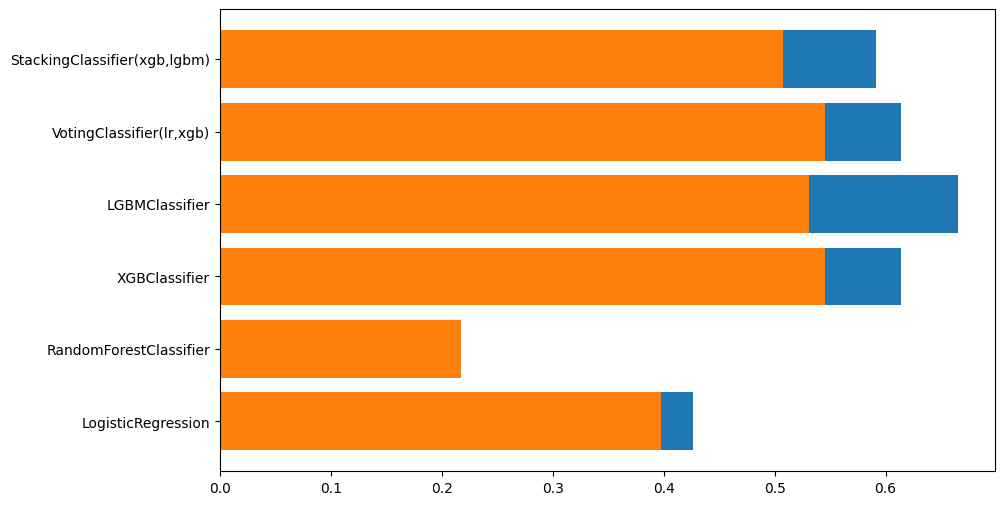

In [268]:
plt.figure(figsize=(10, 6))
plt.barh(data['model'], data['recall_train'], label='Train')
plt.barh(data['model'], data['recall_test'], label='Test')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

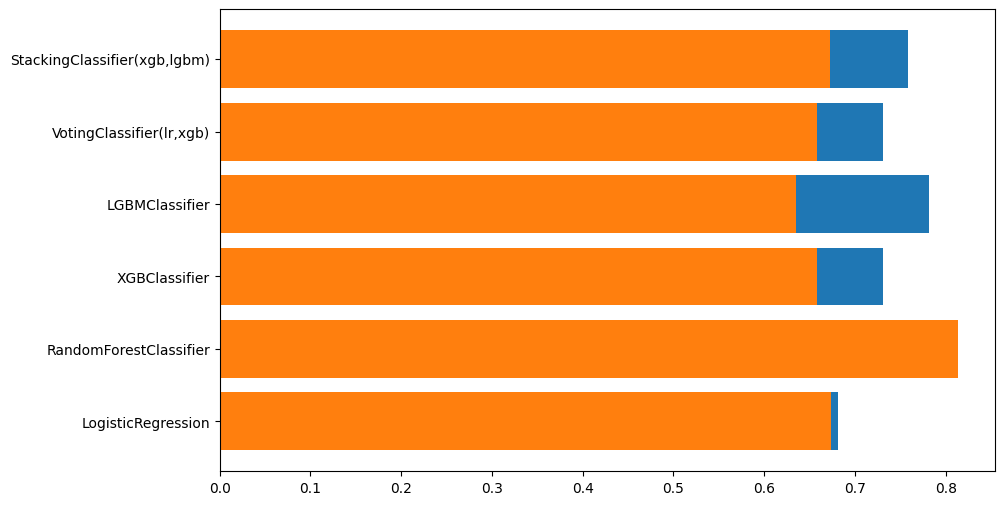

In [269]:
plt.figure(figsize=(10, 6))
plt.barh(data['model'], data['precision_train'], label='Train')
plt.barh(data['model'], data['precision_test'], label='Test')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

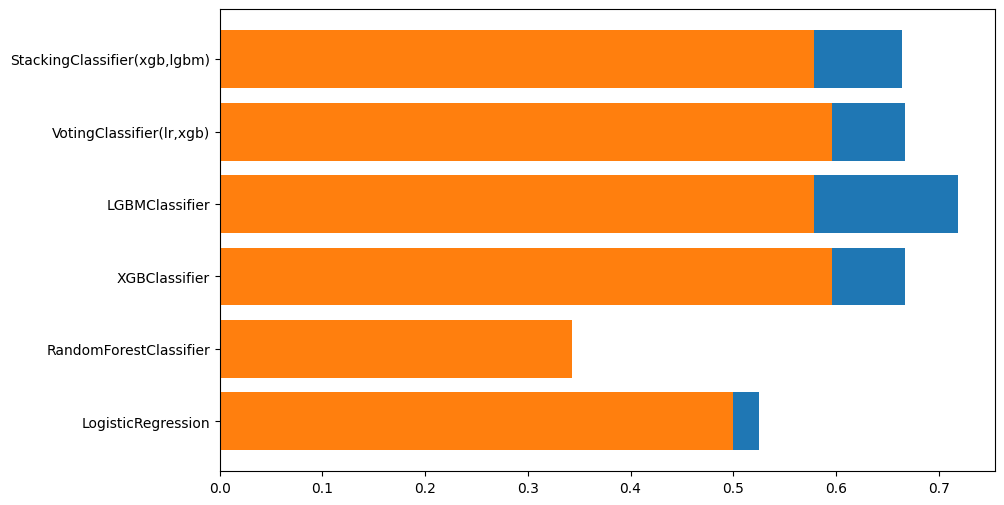

In [270]:
plt.figure(figsize=(10, 6))
plt.barh(data['model'], data['f1_train'], label='Train')
plt.barh(data['model'], data['f1_test'], label='Test')
plt.show

In [271]:
import optuna
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    n_estimators = trial.suggest_categorical("n_estimators", [100, 200,300])
    learning_rate = trial.suggest_categorical("learning_rate", [0.05, 0.1,0.2])
    max_depth = trial.suggest_categorical("max_depth", [3,4,5])
    min_child_weight = trial.suggest_categorical("min_child_weight", [3,5,7])
    gamma = trial.suggest_categorical("gamma", [0.1,0.5,1.0])
    subsample = trial.suggest_categorical("subsample", [0.7,0.8,0.9])
    reg_alpha = trial.suggest_categorical("reg_alpha", [0.1,1])

    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,max_depth=max_depth,min_child_weight=min_child_weight,gamma=gamma,subsample=subsample,reg_alpha=reg_alpha)

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="recall")
    return np.mean(scores)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best params:", study.best_params)
print("Best Reacall:", study.best_value)


[I 2026-02-09 02:02:31,903] A new study created in memory with name: no-name-20e45216-4d2a-4d45-88c1-70e86bf9b7ad
[I 2026-02-09 02:02:34,833] Trial 0 finished with value: 0.5405340586704103 and parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.1, 'subsample': 0.9, 'reg_alpha': 1}. Best is trial 0 with value: 0.5405340586704103.
[I 2026-02-09 02:02:37,419] Trial 1 finished with value: 0.5397765493843408 and parameters: {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.5, 'subsample': 0.8, 'reg_alpha': 1}. Best is trial 0 with value: 0.5405340586704103.
[I 2026-02-09 02:02:40,633] Trial 2 finished with value: 0.5382410575882541 and parameters: {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 1.0, 'subsample': 0.8, 'reg_alpha': 1}. Best is trial 0 with value: 0.5405340586704103.
[I 2026-02-09 02:02:41,213] Trial 3 finished with value: 0.535187622

Best params: {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.0, 'subsample': 0.7, 'reg_alpha': 1}
Best Reacall: 0.5520078383200258


In [397]:
params = {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 1.0, 'subsample': 0.8, 'reg_alpha': 0.1}

In [398]:
model = XGBClassifier(**params)

In [399]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [400]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [401]:
recall_score(train_pred,y_train)

0.7261029411764706

In [402]:
recall_score(test_pred,y_test)

0.6389496717724289

In [403]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [404]:
cross_val_score(model, X_train, y_train, cv=cv, scoring="recall").mean()

np.float64(0.5338183473361043)

In [409]:
exp = shap.TreeExplainer(model, X_test)
shap_values = exp.shap_values(X_test)

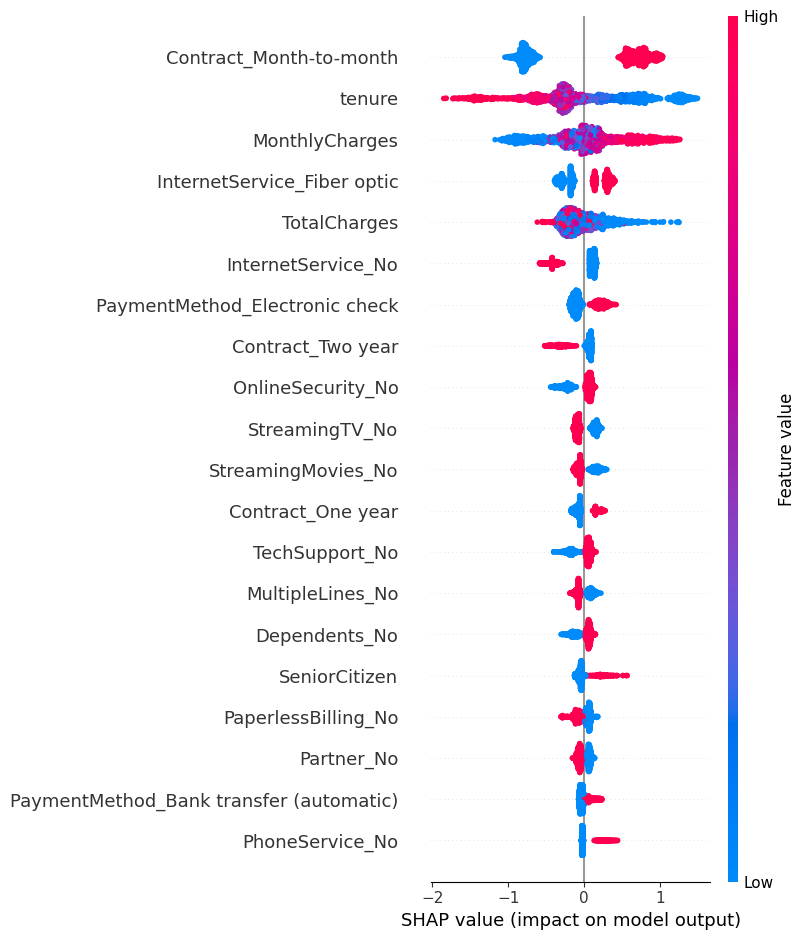

In [417]:
shap.summary_plot(shap_values,X_test)
plt.show()

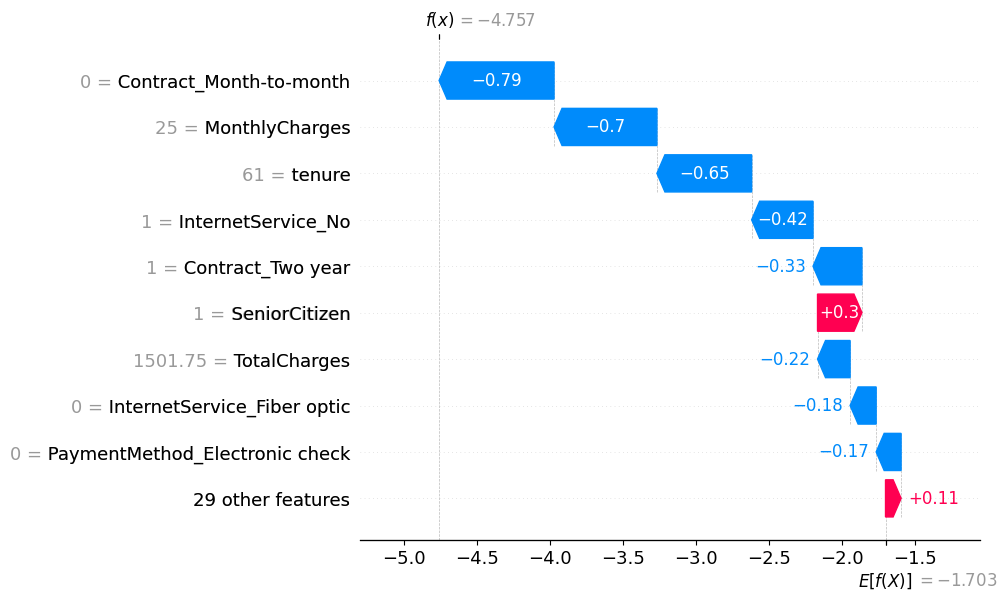

In [415]:
instance_index = 0

single_instance_shap_values = shap_values[instance_index]
base_value = exp.expected_value

single_instance_features = X_test.iloc[instance_index]

explanation_object = shap.Explanation(
    values=single_instance_shap_values,
    base_values=base_value,
    data=single_instance_features.values,
    feature_names=X_test.columns.tolist()
)

shap.plots.waterfall(explanation_object)
plt.show()

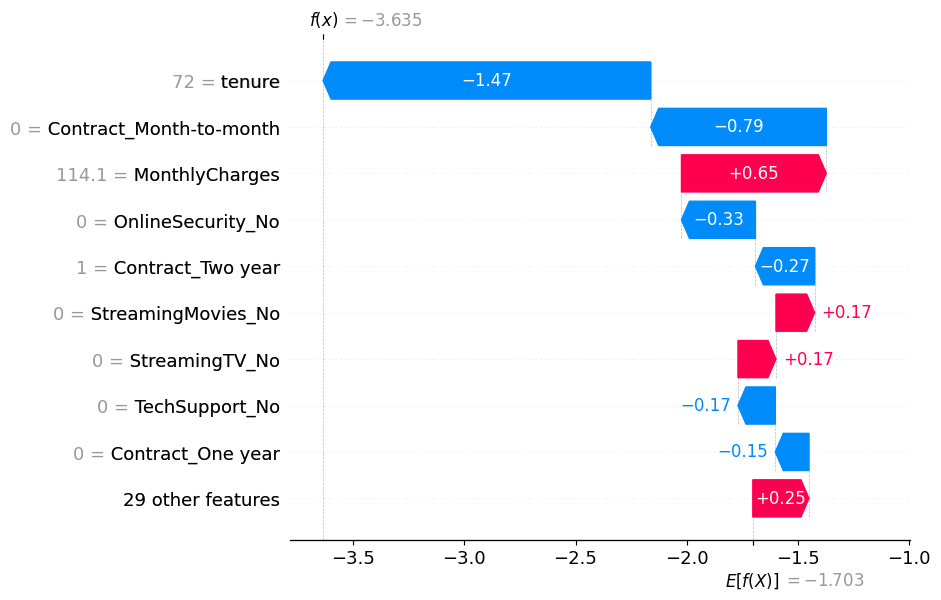

In [416]:
instance_index = 500

single_instance_shap_values = shap_values[instance_index]
base_value = exp.expected_value

single_instance_features = X_test.iloc[instance_index]

explanation_object = shap.Explanation(
    values=single_instance_shap_values,
    base_values=base_value,
    data=single_instance_features.values,
    feature_names=X_test.columns.tolist()
)

shap.plots.waterfall(explanation_object)
plt.show()

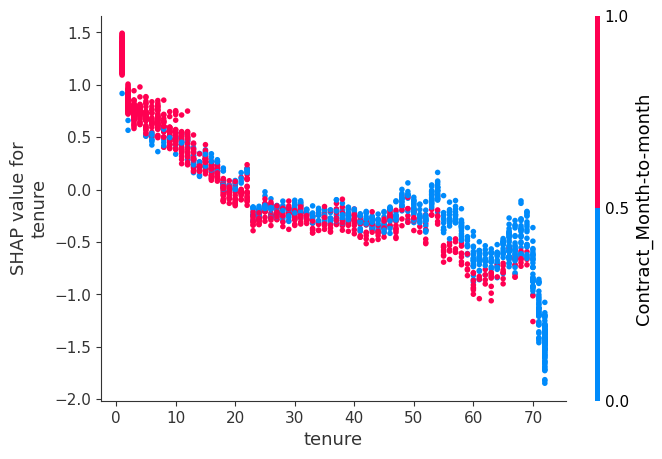

In [420]:
new_var0 = shap.dependence_plot('tenure',shap_values,X_test)
new_var0